# 필수과제 : Etherscan.io API를 활용해 잔고 및 트랜잭션 정보 출력


## API Key 발급 방법
1. https://etherscan.io/register 에 접속해 회원가입을 합니다.
2. 로그인 후 우상단 계정 정보에서 'API Keys' 클릭(https://etherscan.io/myapikey)
3. '+ Add'라고 적힌 파란색 버튼 클릭
4. App Name 입력 후 'Create New API Key' 클릭
5. 다시 링크를 새로고침하면 API Key Token이 발급되었음을 확인할 수 있습니다.

* 참고 : 무료 API 플랜의 경우 초 당 5 calls까지 가능합니다.
* 참고 : https://docs.etherscan.io/


## 과제 요구사항

1. API를 호출하여 특정 Ethereum 주소에 대한 Address Balance(잔액)와 Transaction History(거래이력)를 출력하는 코드가 포함되어야 합니다. 주소는 '0x28818906195D1c430DE6FB67a4dE79520f1e3659'로 통일하겠습니다.
2. Transaction History 요소는 4개 이상 포함되어야 합니다.
3. 출력 결과는 예시와 비슷해야 하며, 본인의 API Key는 지우고 제출하시면 됩니다.

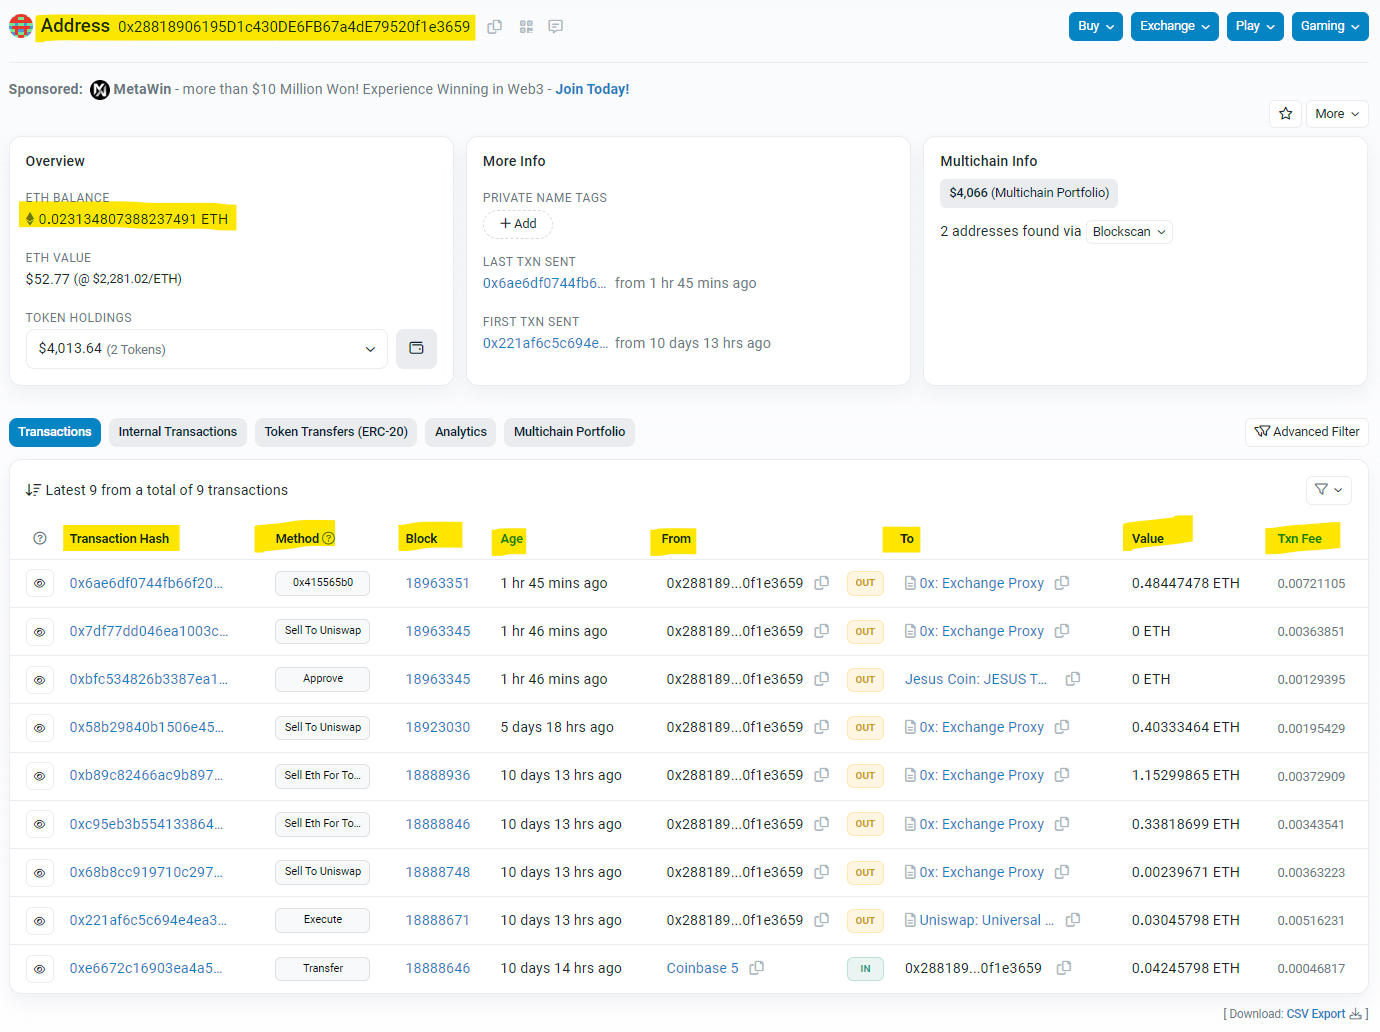

* 참고 : Transaction History에는 'Transaction Hash', 'Method', 'Block', 'Age', 'From', 'To', 'Value', 'Txn Fee' 등의 요소가 있습니다. 예시에서는 Transaction Hash와 Value 2개를 출력했습니다.

In [ ]:
# 출력 예시

Address Balance: 0.02313480738823749 ETH

Transaction History:
TxHash: 0xe6672c16903ea4a5671f2aae985df2487339c9c28e9ee2f6766f22d4cd523eae, Value: 0.04245798 ETH
TxHash: 0x221af6c5c694e4ea33a81ecf83bd41a6e0c1a18f8b7a2083422af2714956fe2d, Value: 0.03045798 ETH
TxHash: 0x68b8cc919710c297ca13640facf740d81e02d2aa63ac02d48b728c7b9a10a7c6, Value: 0.002396719992590054 ETH
TxHash: 0xc95eb3b5541338649f1631ca2477769c4416892707d14e62c13b626b88bbc5b1, Value: 0.33818699633928984 ETH
TxHash: 0xb89c82466ac9b897ac50d7ddb13c860a88b959dbea1bccfa9d5e067bd5dd8996, Value: 1.152998654622383 ETH
TxHash: 0x58b29840b1506e45554a0ccee4809e56fe7f37b8960bcd1ad593d6d8bf4a90f1, Value: 0.40333464418635806 ETH
TxHash: 0xbfc534826b3387ea117d51be50eebe25837d89d439c1d4e2e1088a3e0f8e3269, Value: 0.0 ETH
TxHash: 0x7df77dd046ea1003c4a537f622f9bb28d2467b6bcef3ebbb2b4ea9ab3c0a652f, Value: 0.0 ETH
TxHash: 0x6ae6df0744fb66f20297178c04d4e841d75f0323027862975c1954ab0fe5250d, Value: 0.48447478528958376 ETH


In [38]:
# 여기에 코드를 작성해주세요
import requests

#eth 단위 변환 함수 
def into_eth (num):
    return float(num) / 10**18

ethereum_address = "0x28818906195D1c430DE6FB67a4dE79520f1e3659"
client_id = 

burl = f'https://api.etherscan.io/api?module=account&action=balance&address={ethereum_address}&tag=latest&apikey={client_id}'
turl = f'https://api.etherscan.io/api?module=account&action=txlist&address={ethereum_address}&startblock=0&endblock=99999999&page=1&offset=15&sort=desc&apikey={client_id}'

b_response = requests.get(burl)
t_response = requests.get(turl)

# address balance
res = b_response.json()
eth_val =into_eth(res['result']) 
print(f'Address Balance: {eth_val} ETH\n')

#Transaction history
print('Transactin History\n')
result = t_response.json()['result']

for data in result:
    txhash = data['hash'] ; block = data['blockNumber'] 
    value = into_eth(data['value']); gasprice = float(data['gasPrice']) / 10**9 #Gwei 단위 변환 

    print(f'TxHash : {txhash}, Block : {block},\n Value : {value} ETH, Gas Price (in Gwei) : {gasprice}\n' )

Address Balance: 0.014556968666316571 ETH

Transactin History

TxHash : 0xfcb42dc785acbf80588a6963c8502e5c9074899bcf7e18196e5f0b726df01798, Block : 18972307,
 Value : 0.0 ETH, Gas Price (in Gwei) : 35.220754776

TxHash : 0xabdfb3bb62bb4b944fa799fb0453507b210099f1fa08f64ab1d7139d2278660b, Block : 18972307,
 Value : 0.0 ETH, Gas Price (in Gwei) : 35.220754776

TxHash : 0x6ae6df0744fb66f20297178c04d4e841d75f0323027862975c1954ab0fe5250d, Block : 18963351,
 Value : 0.48447478528958376 ETH, Gas Price (in Gwei) : 28.073118537

TxHash : 0x7df77dd046ea1003c4a537f622f9bb28d2467b6bcef3ebbb2b4ea9ab3c0a652f, Block : 18963345,
 Value : 0.0 ETH, Gas Price (in Gwei) : 27.774960716

TxHash : 0xbfc534826b3387ea117d51be50eebe25837d89d439c1d4e2e1088a3e0f8e3269, Block : 18963345,
 Value : 0.0 ETH, Gas Price (in Gwei) : 27.774960716

TxHash : 0x58b29840b1506e45554a0ccee4809e56fe7f37b8960bcd1ad593d6d8bf4a90f1, Block : 18923030,
 Value : 0.403334644186358 ETH, Gas Price (in Gwei) : 14.173961484

TxHash : 0xb8

# 도전과제 : openweathermap API를 활용해 서울의 날씨 예보 출력 및 시각화


## API Key 발급 방법
1. https://openweathermap.org/ 에 접속해 회원가입을 합니다.
2. 로그인 후 우상단 계정 정보에서 'My API Keys' 클릭(https://home.openweathermap.org/api_keys)
3. 'Create Key'에서 이름 입력 후 'Generate' 클릭
4. 다시 링크를 새로고침하면 Key가 발급되었음을 확인할 수 있습니다.

* 참고 : https://openweathermap.org/api/one-call-3
* 참고 : 회원가입을 하지 않고 무료 버전 API Subscribe가 가능하긴 한데, 이 경우 결제과정(과금은 안됨)이 추가되니 회원가입을 적극 권장



## 과제 요구사항

1. API를 호출하여 서울의 날씨 예보를 보여주고 시각화까지 진행해주세요.
2. '섭씨 온도, 습도, 풍속' 데이터는 반드시 포함되어야 합니다.
3. 출력 결과는 예시와 비슷해야 하며, 본인의 API Key는 지우고 제출하시면 됩니다.

* 참고 : 무료 API 플랜의 경우 분 당 60 calls, 5일 간의 3시간 단위 예보를 제공합니다.

            Start Time            End Time           Weather
0  2024-01-08 18:00:00 2024-01-08 21:00:00     broken clouds
1  2024-01-09 00:00:00 2024-01-09 00:00:00        light snow
2  2024-01-09 03:00:00 2024-01-09 03:00:00              snow
3  2024-01-09 06:00:00 2024-01-09 12:00:00        light snow
4  2024-01-09 15:00:00 2024-01-09 15:00:00   overcast clouds
5  2024-01-09 18:00:00 2024-01-10 06:00:00     broken clouds
6  2024-01-10 09:00:00 2024-01-10 12:00:00        few clouds
7  2024-01-10 15:00:00 2024-01-10 21:00:00         clear sky
8  2024-01-11 00:00:00 2024-01-11 00:00:00  scattered clouds
9  2024-01-11 03:00:00 2024-01-11 06:00:00   overcast clouds
10 2024-01-11 09:00:00 2024-01-11 12:00:00        few clouds
11 2024-01-11 15:00:00 2024-01-13 15:00:00         clear sky


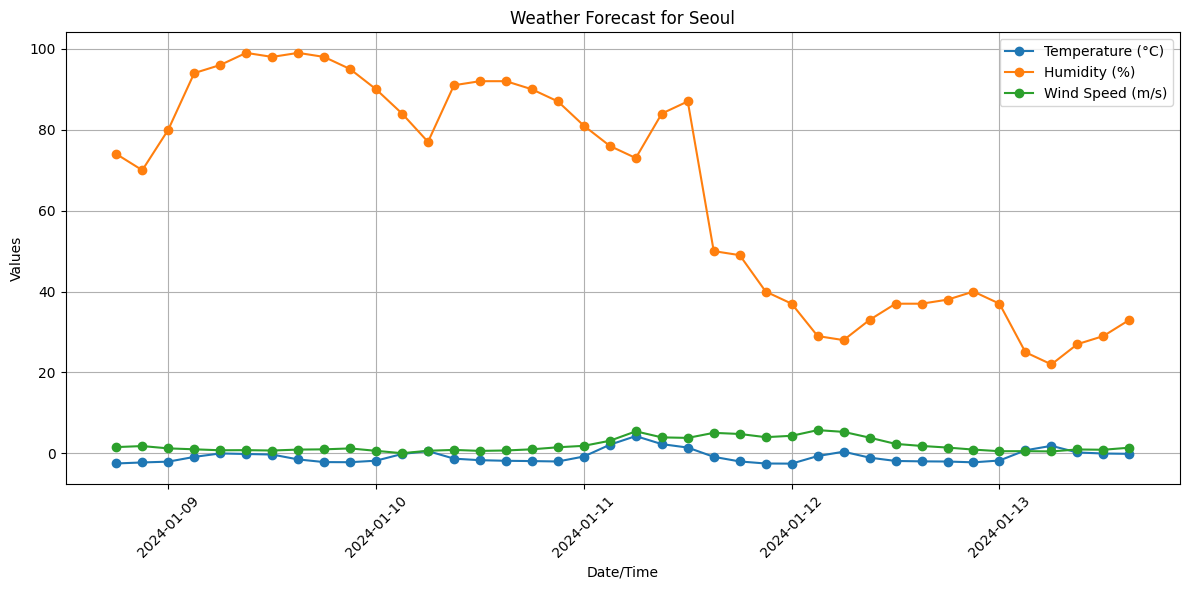

In [ ]:
# 코드 일부 및 출력 예시

import matplotlib.pyplot as plt
from datetime import datetime

def get_weather_forecast(api_key, city_name):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city_name,        # 검색할 도시 이름
        "appid": api_key,      # API 액세스 키
        "units": "metric"      # 온도를 섭씨로 받기 위해 metric 사용
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if response.status_code == 200:
            # 일기 예보 정보 불러오기

                # 날짜/시간 정보와 해당 시간의 온도, 습도, 바람 속도, 날씨를 리스트에 추가

            # 날씨 변동 사항 테이블로 출력

            # pandas DataFrame으로 변환하여 표 출력

            # 그래프 그리기

if __name__ == "__main__":
    # OpenWeatherMap API 키와 도시 이름 설정
    api_key = "#########"
    city_name = "Seoul"

    # 함수 호출로 일기 예보 정보 가져오기
    get_weather_forecast(api_key, city_name)

In [258]:
# 여기에 코드를 작성해주세요
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
import seaborn as sns

def get_weather_forecast(api_key, city_name):
    base_url = "http://api.openweathermap.org/data/2.5/forecast"
    params = {
        "q": city_name,        # 검색할 도시 이름
        "appid": api_key,      # API 액세스 키
        "units": "metric"      # 온도를 섭씨로 받기 위해 metric 사용
    }

    try:
        response = requests.get(base_url, params=params)
        data = response.json()

        if response.status_code == 200:
            # 날짜/시간 정보와 해당 시간의 온도, 습도, 바람 속도, 날씨를 각각의 딕셔너리에 추가 
            weather_df = {'Temperature': [], 'Humidity':[], 'Wind Speed': [], 'Date/Time':[]}
            weathers = {} #날씨 변동 사항

            for dat in data['list']:
                weather_df['Temperature'].append(dat['main']['temp'])
                weather_df['Humidity'].append(float(dat['main']['humidity'])/100)
                weather_df['Wind Speed'].append(dat['wind']['speed'])
                weather_df['Date/Time'].append(dat['dt_txt'])
                
                #날짜 (시간)에 따른 날씨 기록 
                for wea in dat['weather']:
                    weathers[dat['dt_txt']] = []
                    weathers[dat['dt_txt']].append(wea['description'])

            data = pd.DataFrame(weather_df)   #날짜, 습도, 온도, 바람 속도는 df로 변환
            
            #날씨 변화 info 
            date = list(weathers.keys()) #날짜 리스트 생성
            print(f'\tStart Time\tEnd Time\t\t\tWeather')

            # 날씨가 동일한 기간 구해서 출력하기 
            for i in range (len(date)-1):
                if weathers[date[i]] != weathers[date[i+1]]:
                    start = date[i] ; end = date[i] ; weather = weathers[date[i]]
                    print(f'{start} {end}\t\t{weather[0]}')
                else:
                    start = date[i] ; end = date[i+1] ; weather = weathers[date[i]]


            # 그래프 그리기
            dates = data['Date/Time'].apply(lambda x : x.split()[0])
            xtick = list(set(dates)) #xtick 눈금에 적을 value 구하기 
            
            # xtick label 위치 구하기 
            dates = dates.value_counts()
            fin = [] ; val = 0
            for i in range (len(dates)):
                val += dates[i]
                fin.append(val)
                
            # 시각화 
            labels = ['Temperature','Humidity','Wind Speed']

            plt.figure(figsize=(15,7))

            for label in labels:
                sns.lineplot(x='Date/Time', y=label, data = data, marker = 'o')

            plt.xlabel('Values')
            plt.legend(labels)
            plt.xticks(fin, label = xtick, rotation = 45)
            plt.grid()
            plt.title('Weather Forecast for Seoul')
            plt.show()

    except:
        print('! error ! Please check your code')

	Start Time	End Time			Weather
2024-01-17 09:00:00 2024-01-17 09:00:00		freezing rain
2024-01-17 18:00:00 2024-01-17 18:00:00		light rain
2024-01-18 00:00:00 2024-01-18 00:00:00		overcast clouds
2024-01-18 12:00:00 2024-01-18 12:00:00		broken clouds
2024-01-21 09:00:00 2024-01-21 09:00:00		overcast clouds
2024-01-21 12:00:00 2024-01-21 12:00:00		light snow
2024-01-21 18:00:00 2024-01-21 18:00:00		snow
2024-01-22 00:00:00 2024-01-22 00:00:00		light snow


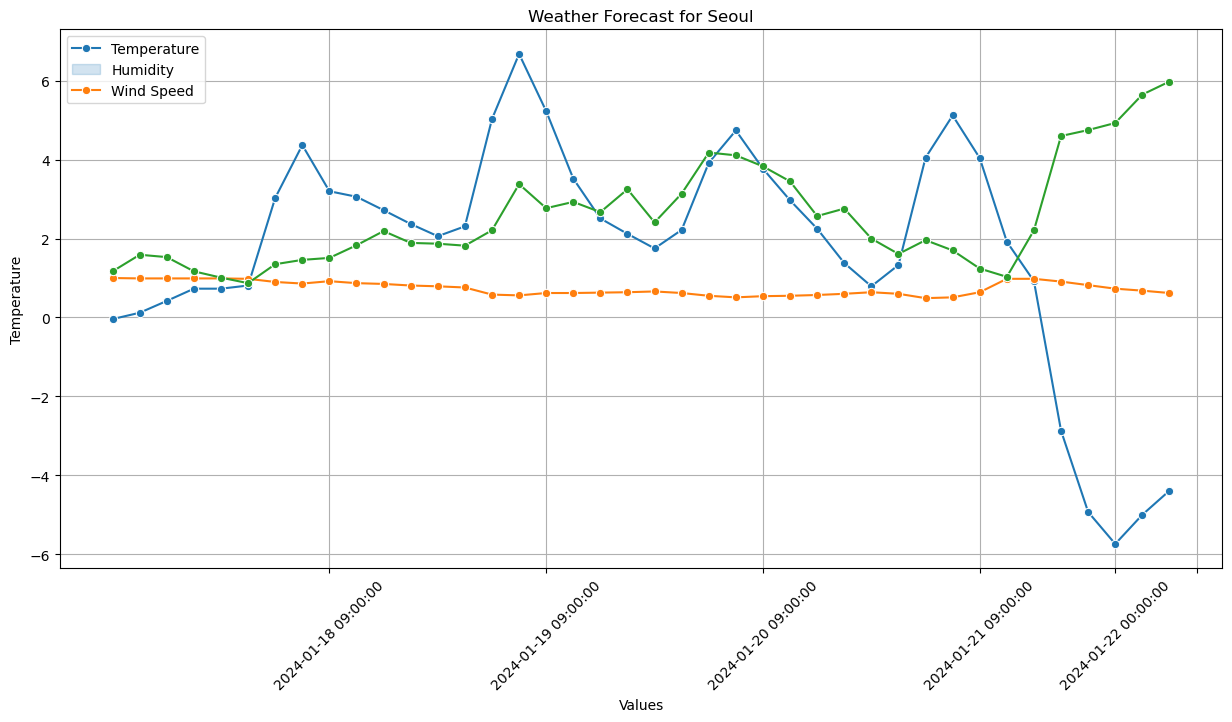

In [259]:
api_key = 
city_name = "Seoul"

# 함수 호출로 일기 예보 정보 가져오기
get_weather_forecast(api_key, city_name)

## 제출 안내

* 필수과제는 반드시 수행해야 하며, 도전과제는 선택이나 시도를 권장합니다.
* 코드 파일(.ipynb)을 본인 github 과제 repository에 제출
* 과제 기한 : 2024.1.17(수) 23:59
* 지각 제출 기한 : 2024.1.18(목) 23:59


### POSTMAN 실습 및 과제 : https://may24th.notion.site/may24th/POSTMAN-API-79a4ca11dcb44ee8a338b37ece6baf1a